In [1]:
# Importar librerias standard de Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import XGate, RYGate #Puerta not (X) y rotacion (RY) 
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import *

import numpy as np

service = QiskitRuntimeService(channel="local")

In [2]:
mygate = RYGate(np.pi/2)

In [3]:
print(mygate.to_matrix())

[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


In [4]:
qubit = QuantumCircuit(1, 2)
#qubit.append(XGate(), [0])
qubit.append(RYGate(2*(np.pi/3)), [0])
qubit.measure(0, 0)
qubit.append(XGate(), [0])
qubit.measure(0, 1)

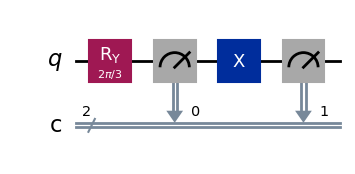

In [5]:
qubit.draw(output="mpl")

In [6]:
#Iniciamos la simulación
backend = Aer.get_backend('statevector_simulator')

job = backend.run(qubit)
result = job.result()
outputstate = result.get_statevector(qubit, decimals=6)

print(outputstate)
display(array_to_latex(outputstate))

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

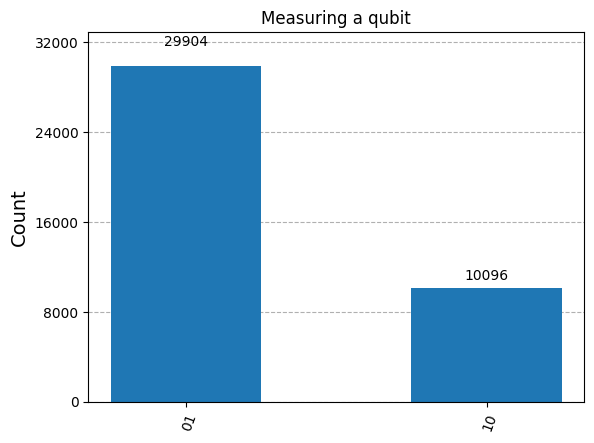

In [7]:
# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(qubit, simulator)

# Run and get counts
result = simulator.run(circuit,shots=40000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measuring a qubit')